<h1 id="tocheading">Table of Contents and Notebook Setup</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import cm
from matplotlib.patches import Polygon
from matplotlib.ticker import MultipleLocator

import seaborn as sns
import scipy as sp
from scipy import signal
from scipy.interpolate import griddata

from datetime import timedelta, datetime
import warnings
from IPython.display import display, Math
warnings.filterwarnings('ignore')

# Importing Data

## Get Station Number as a Function of Longitudes and Latitudes

In [3]:
lon_and_lat = np.genfromtxt('AllStations_temperature_h_2017.dat', delimiter=" ", max_rows=2)
longitudes = lon_and_lat[0][~np.isnan(lon_and_lat[0])]
latitudes = lon_and_lat[1][~np.isnan(lon_and_lat[1])]

indices = list(zip(np.array(longitudes, dtype=str), np.array(latitudes, dtype=str)))
indices.insert(0, "time")

Dictionary that provides the mapping:

In [11]:
location_to_station_num = dict(zip(indices[1::], np.arange(0,37)))
station_num_to_location = dict(zip(np.arange(0,37), indices[1::]))

## Import Data

In [5]:
winter_df_2017 = pd.read_csv('Dataframes/winter_2017.csv', header=[0,1], index_col=0).ffill()
summer_df_2017 = pd.read_csv('Dataframes/summer_2017.csv', header=[0,1], index_col=0).ffill()
winter_df_2016 = pd.read_csv('Dataframes/winter_2016.csv', header=[0,1], index_col=0).ffill()
summer_df_2016 = pd.read_csv('Dataframes/summer_2016.csv', header=[0,1], index_col=0).ffill()
winter_df_2015 = pd.read_csv('Dataframes/winter_2015.csv', header=[0,1], index_col=0).ffill()
summer_df_2015 = pd.read_csv('Dataframes/summer_2015.csv', header=[0,1], index_col=0).ffill()
winter_df_2014 = pd.read_csv('Dataframes/winter_2014.csv', header=[0,1], index_col=0).ffill()
summer_df_2014 = pd.read_csv('Dataframes/summer_2014.csv', header=[0,1], index_col=0).ffill()
winter_df_2013 = pd.read_csv('Dataframes/winter_2013.csv', header=[0,1], index_col=0).ffill()
summer_df_2013 = pd.read_csv('Dataframes/summer_2013.csv', header=[0,1], index_col=0).ffill()
winter_df_2012 = pd.read_csv('Dataframes/winter_2012.csv', header=[0,1], index_col=0).ffill()
summer_df_2012 = pd.read_csv('Dataframes/summer_2012.csv', header=[0,1], index_col=0).ffill()
winter_df_2011 = pd.read_csv('Dataframes/winter_2011.csv', header=[0,1], index_col=0).ffill()
summer_df_2011 = pd.read_csv('Dataframes/summer_2011.csv', header=[0,1], index_col=0).ffill()
winter_df_2010 = pd.read_csv('Dataframes/winter_2010.csv', header=[0,1], index_col=0).ffill()
summer_df_2010 = pd.read_csv('Dataframes/summer_2010.csv', header=[0,1], index_col=0).ffill()

In [6]:
winter_stations_2017 = np.array([location_to_station_num[winter_df_2017.columns[i]] for i in range(len(winter_df_2017.columns))])
summer_stations_2017 = np.array([location_to_station_num[summer_df_2017.columns[i]] for i in range(len(summer_df_2017.columns))])
winter_stations_2016 = np.array([location_to_station_num[winter_df_2016.columns[i]] for i in range(len(winter_df_2016.columns))])
summer_stations_2016 = np.array([location_to_station_num[summer_df_2016.columns[i]] for i in range(len(summer_df_2016.columns))])
winter_stations_2015 = np.array([location_to_station_num[winter_df_2015.columns[i]] for i in range(len(winter_df_2015.columns))])
summer_stations_2015 = np.array([location_to_station_num[summer_df_2015.columns[i]] for i in range(len(summer_df_2015.columns))])
winter_stations_2014 = np.array([location_to_station_num[winter_df_2014.columns[i]] for i in range(len(winter_df_2014.columns))])
summer_stations_2014 = np.array([location_to_station_num[summer_df_2014.columns[i]] for i in range(len(summer_df_2014.columns))])
winter_stations_2013 = np.array([location_to_station_num[winter_df_2013.columns[i]] for i in range(len(winter_df_2013.columns))])
summer_stations_2013 = np.array([location_to_station_num[summer_df_2013.columns[i]] for i in range(len(summer_df_2013.columns))])
winter_stations_2012 = np.array([location_to_station_num[winter_df_2012.columns[i]] for i in range(len(winter_df_2012.columns))])
summer_stations_2012 = np.array([location_to_station_num[summer_df_2012.columns[i]] for i in range(len(summer_df_2012.columns))])
winter_stations_2011 = np.array([location_to_station_num[winter_df_2011.columns[i]] for i in range(len(winter_df_2011.columns))])
summer_stations_2011 = np.array([location_to_station_num[summer_df_2011.columns[i]] for i in range(len(summer_df_2011.columns))])
winter_stations_2010 = np.array([location_to_station_num[winter_df_2010.columns[i]] for i in range(len(winter_df_2010.columns))])
summer_stations_2010 = np.array([location_to_station_num[summer_df_2010.columns[i]] for i in range(len(summer_df_2010.columns))])

# Basic Plot

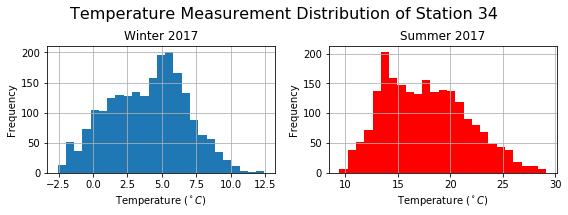

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(8,3))

ax[0].hist(winter_df_2017[station_num_to_location[34]], bins=25)
ax[1].hist(summer_df_2017[station_num_to_location[34]], bins=25, color='r')

props_wint = {'title': 'Winter 2017', 'xlabel': r'Temperature ($^\circ C$)',
        'ylabel': 'Frequency'}
props_sum = {'title': 'Summer 2017', 'xlabel': r'Temperature ($^\circ C$)',
        'ylabel': 'Frequency'}

ax[0].set(**props_wint)
ax[1].set(**props_sum)

ax[0].grid()
ax[1].grid()

fig.suptitle(r'Temperature Measurement Distribution of Station 34', fontsize=16)
fig.tight_layout()
fig.subplots_adjust(top=0.80)

plt.savefig('plots/stat_34_temp_mes.png', dpi=300)
plt.show()

# Violin Plots

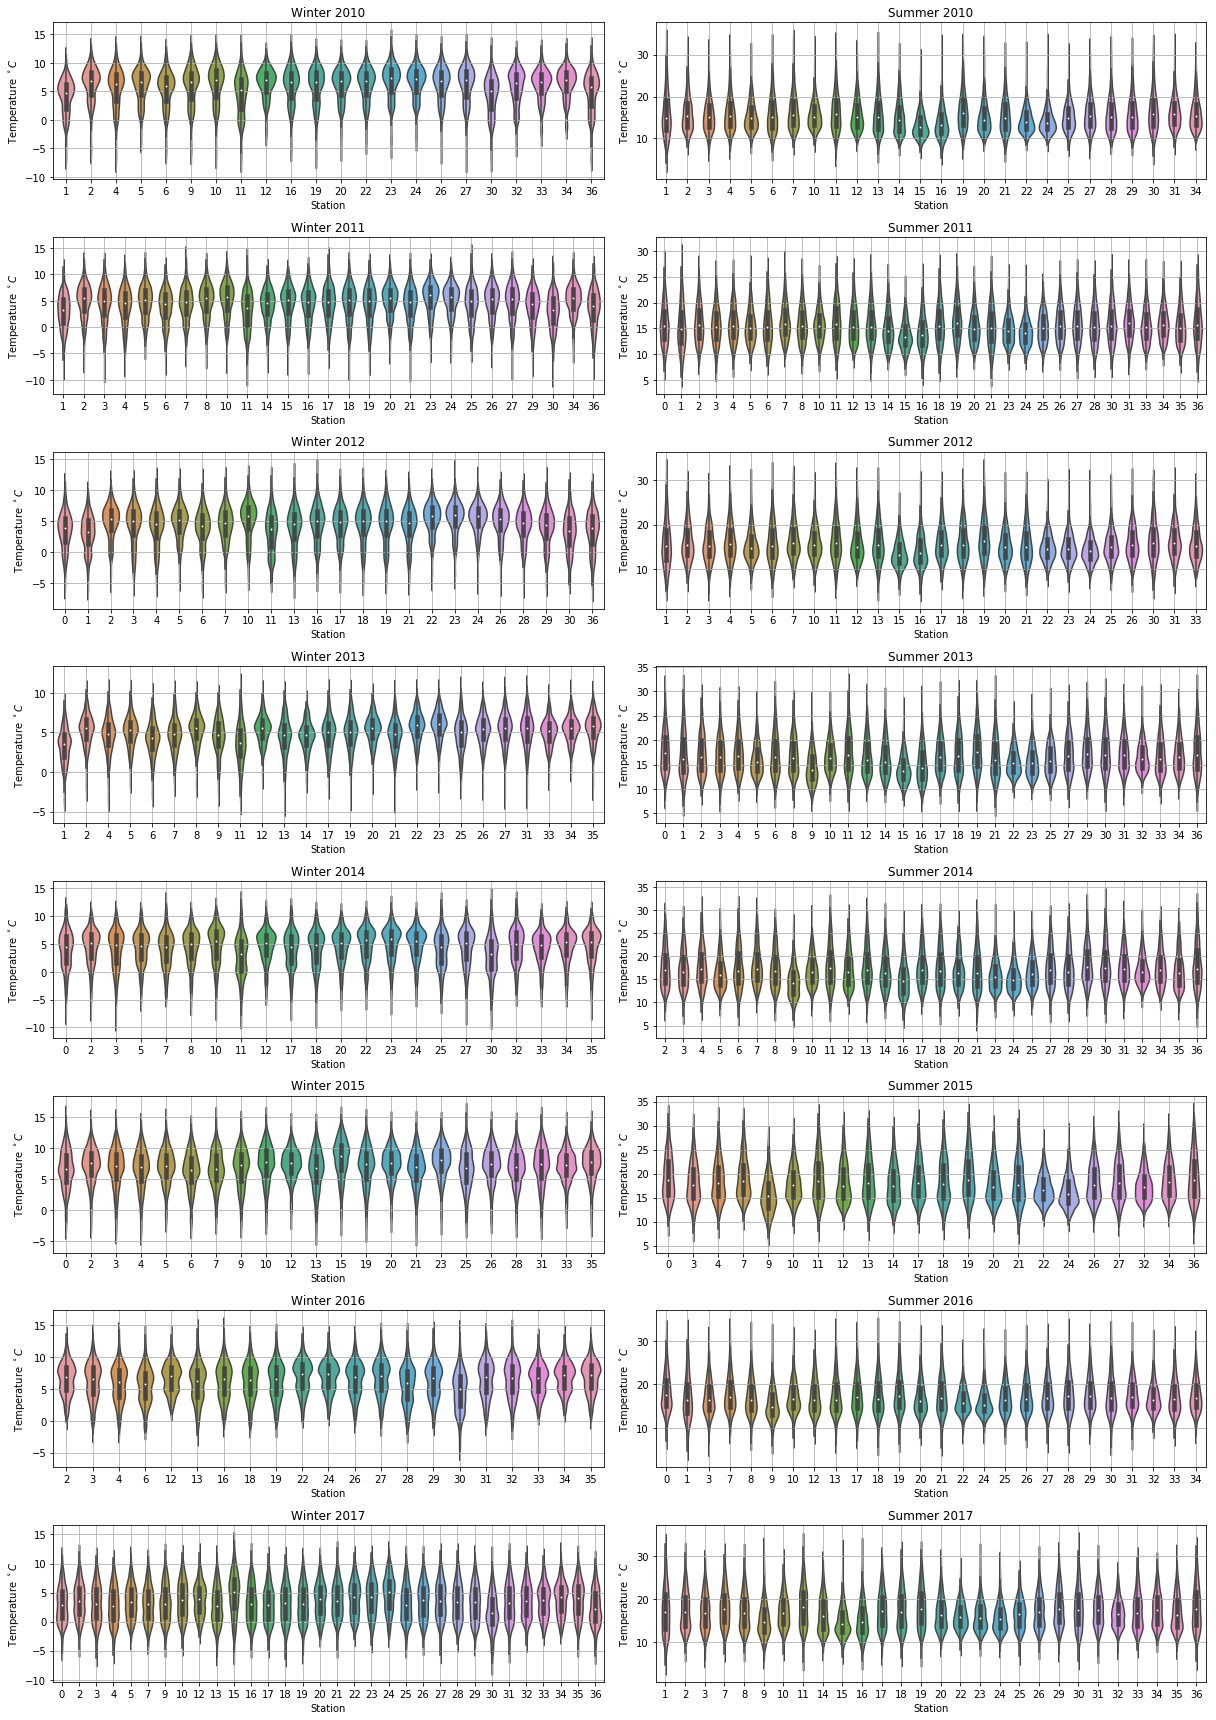

In [46]:
fig, ax = plt.subplots(8, 2, figsize=(17,24))

g1 = sns.violinplot(data=winter_df_2010, ax=ax[0][0])
g1.set_xticklabels(winter_stations_2010)

g2 = sns.violinplot(data=summer_df_2010, ax=ax[0][1])
g2.set_xticklabels(summer_stations_2010)

g3 = sns.violinplot(data=winter_df_2011, ax=ax[1][0])
g3.set_xticklabels(winter_stations_2011)

g4 = sns.violinplot(data=summer_df_2011, ax=ax[1][1])
g4.set_xticklabels(summer_stations_2011)

g5 = sns.violinplot(data=winter_df_2012, ax=ax[2][0])
g5.set_xticklabels(winter_stations_2012)

g6 = sns.violinplot(data=summer_df_2012, ax=ax[2][1])
g6.set_xticklabels(summer_stations_2012)

g7 = sns.violinplot(data=winter_df_2013, ax=ax[3][0])
g7.set_xticklabels(winter_stations_2013)

g8 = sns.violinplot(data=summer_df_2013, ax=ax[3][1])
g8.set_xticklabels(summer_stations_2013)


props_2013_sum = {'title': 'Summer 2013', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

props_2012_sum = {'title': 'Summer 2012', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

props_2011_sum = {'title': 'Summer 2011', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

props_2010_sum = {'title': 'Summer 2010', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

props_2013_wint = {'title': 'Winter 2013', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

props_2012_wint = {'title': 'Winter 2012', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

props_2011_wint = {'title': 'Winter 2011', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

props_2010_wint = {'title': 'Winter 2010', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

ax[0][0].set(**props_2010_wint)
ax[1][0].set(**props_2011_wint)
ax[2][0].set(**props_2012_wint)
ax[3][0].set(**props_2013_wint)

ax[0][1].set(**props_2010_sum)
ax[1][1].set(**props_2011_sum)
ax[2][1].set(**props_2012_sum)
ax[3][1].set(**props_2013_sum)

g1 = sns.violinplot(data=winter_df_2014, ax=ax[4][0])
g1.set_xticklabels(winter_stations_2014)

g2 = sns.violinplot(data=summer_df_2014, ax=ax[4][1])
g2.set_xticklabels(summer_stations_2014)

g3 = sns.violinplot(data=winter_df_2015, ax=ax[5][0])
g3.set_xticklabels(winter_stations_2015)

g4 = sns.violinplot(data=summer_df_2015, ax=ax[5][1])
g4.set_xticklabels(summer_stations_2015)

g5 = sns.violinplot(data=winter_df_2016, ax=ax[6][0])
g5.set_xticklabels(winter_stations_2016)

g6 = sns.violinplot(data=summer_df_2016, ax=ax[6][1])
g6.set_xticklabels(summer_stations_2016)

g7 = sns.violinplot(data=winter_df_2017, ax=ax[7][0])
g7.set_xticklabels(winter_stations_2017)

g8 = sns.violinplot(data=summer_df_2017, ax=ax[7][1])
g8.set_xticklabels(summer_stations_2017)


props_2017_sum = {'title': 'Summer 2017', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

props_2016_sum = {'title': 'Summer 2016', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

props_2015_sum = {'title': 'Summer 2015', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

props_2014_sum = {'title': 'Summer 2014', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

props_2017_wint = {'title': 'Winter 2017', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

props_2016_wint = {'title': 'Winter 2016', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

props_2015_wint = {'title': 'Winter 2015', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

props_2014_wint = {'title': 'Winter 2014', 'xlabel': 'Station',
        'ylabel': r"Temperature $^\circ C$"}

ax[4][0].set(**props_2014_wint)
ax[5][0].set(**props_2015_wint)
ax[6][0].set(**props_2016_wint)
ax[7][0].set(**props_2017_wint)

ax[4][1].set(**props_2014_sum)
ax[5][1].set(**props_2015_sum)
ax[6][1].set(**props_2016_sum)
ax[7][1].set(**props_2017_sum)
[a.grid() for a in ax.ravel()]


fig.tight_layout()


plt.savefig('plots/histo_all_station_2010_2017.png', dpi=200)
plt.show()